<h4>Import & Load Data </h4>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for all upcoming plots
sns.set_style('whitegrid')

# Load the dataset from the CSV file
# Make sure the CSV file is in the same directory as your notebook
df = pd.read_csv('data_ecommerce_customer_churn.csv')

# Print the first 5 rows to confirm it loaded correctly
df.head()


: 

<h4> Initial Data Exploration </h4>

In [2]:
# Get a summary of the dataframe, including column data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [3]:
# Get a statistical summary of the numerical columns
df.describe()


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [4]:
# Check for the total number of missing (null) values in each column
df.isnull().sum()


Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

<h4> Data Cleaning </h4>

In [6]:
# --- Data Cleaning: Handling Missing Values ---

# We identified 'Tenure', 'WarehouseToHome', and 'DaySinceLastOrder' as columns with missing data.
# We will use 'imputation' to fill these gaps. A common strategy for numerical
# data is to use the mean or median. Here, we'll use the mean.

# List of columns to be imputed
columns_to_impute = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']

# Loop through each column in our list
for col in columns_to_impute:
    # Check if the column actually has any null values to avoid unnecessary calculations
    if df[col].isnull().any():
        
        # 1. Calculate the mean of the current column, ignoring null values
        mean_value = df[col].mean()
        
        # 2. Fill all missing (NaN) values in that column with the calculated mean
        # The `inplace=True` argument modifies the DataFrame directly without needing to reassign it.
        df[col].fillna(mean_value, inplace=True)
        
        # 3. Print a confirmation message
        print(f"Filled missing values in '{col}' with its mean: {mean_value:.2f}")

# --- Verification Step ---
# After imputation, we check again for missing values to ensure the process was successful.
# The output should show 0 missing values for the imputed columns.
print("\n--- Missing Values Check (After Imputation) ---")
print(df.isnull().sum())


Filled missing values in 'Tenure' with its mean: 10.08
Filled missing values in 'WarehouseToHome' with its mean: 15.65
Filled missing values in 'DaySinceLastOrder' with its mean: 4.53

--- Missing Values Check (After Imputation) ---
Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64


C:\Users\Eric\AppData\Local\Temp\ipykernel_31536\812679800.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


<h4> Exploratory Data Analysis (EDA) </h4>

<h5> Churn Distribution </h5>

C:\Users\Eric\AppData\Local\Temp\ipykernel_31536\1308224838.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette=['#5cb85c', '#d9534f'])


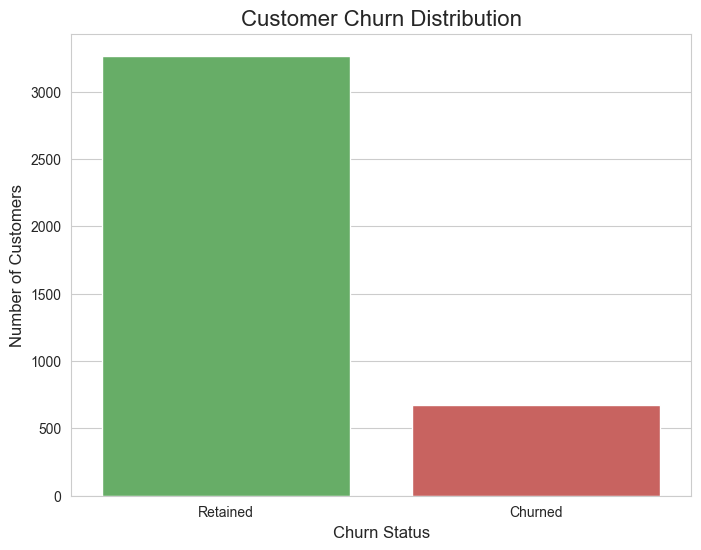

In [8]:
# Visualize the overall churn distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette=['#5cb85c', '#d9534f'])
plt.title('Customer Churn Distribution', fontsize=16)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Churn Status', fontsize=12)
plt.xticks([0, 1], ['Retained', 'Churned'])
plt.show()


<h5> Numerical Feature Distributions </h5>

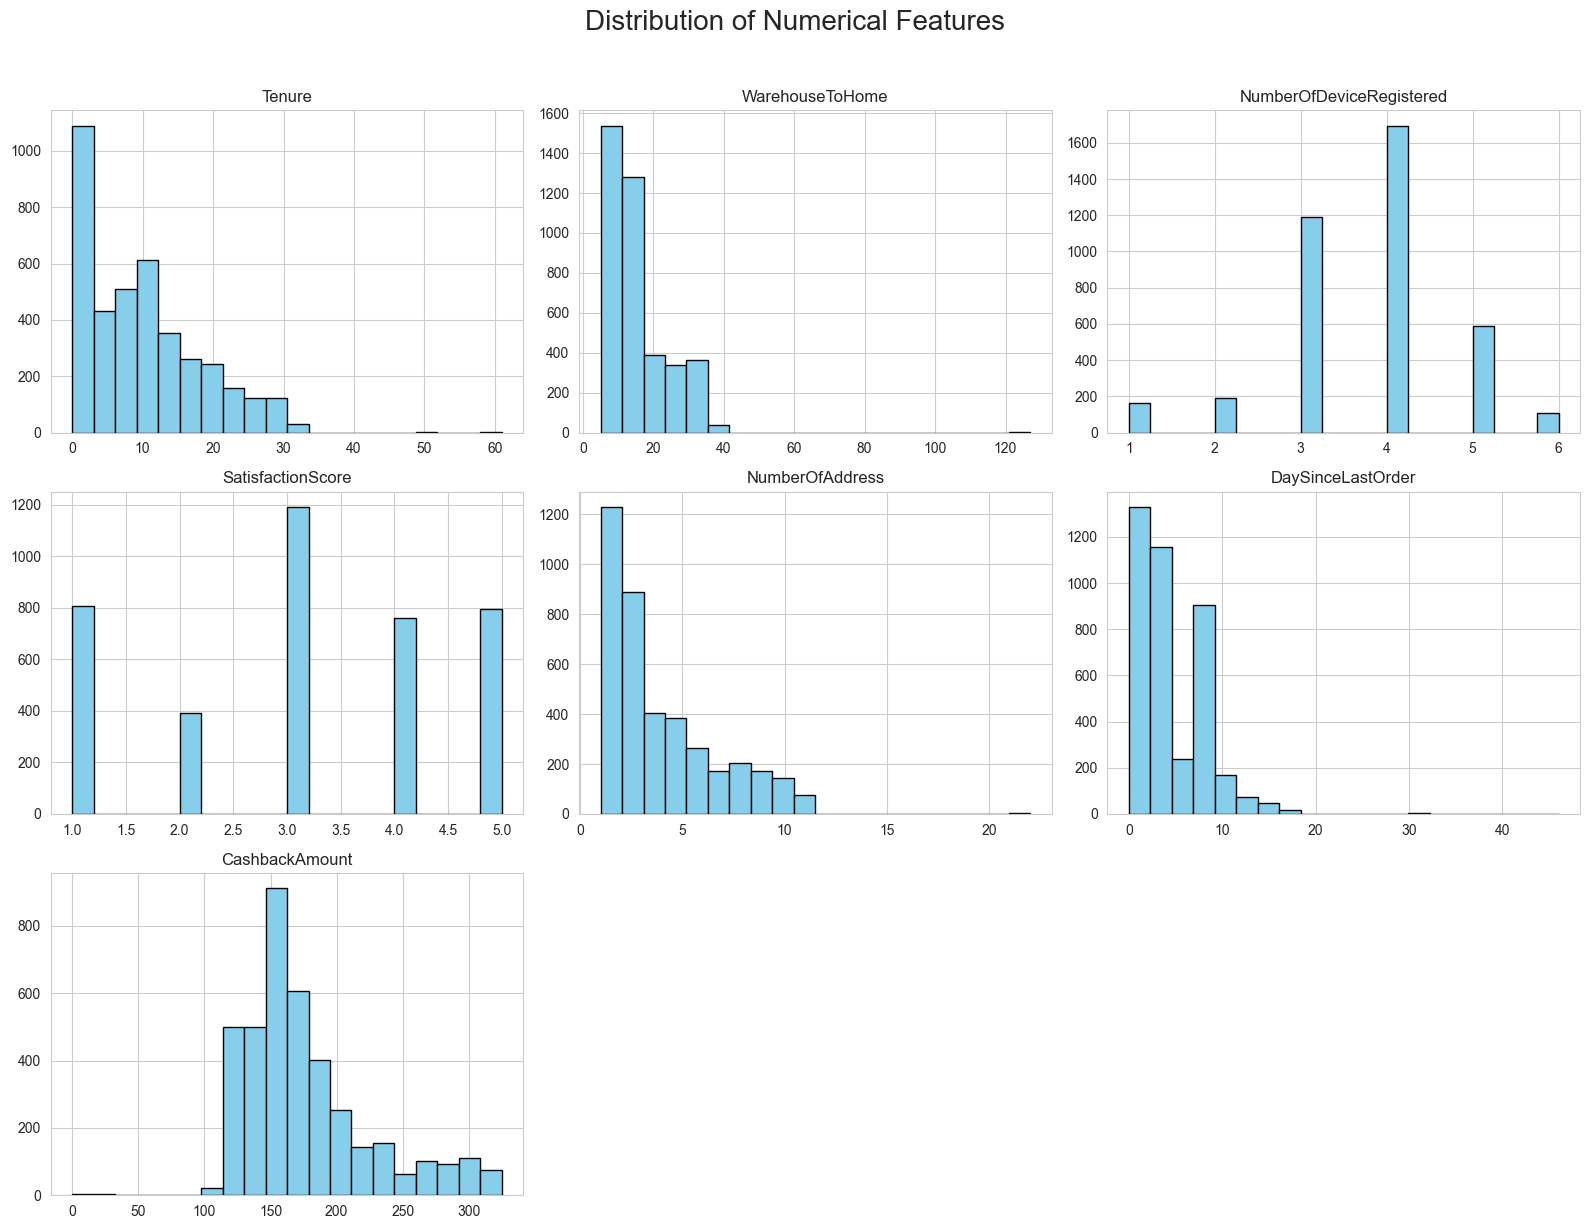

In [9]:
# Plot histograms for all numerical features to see their distributions
numerical_features = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
                      'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']

df[numerical_features].hist(figsize=(16, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()


<h5> Categorical Feature Distributions </h5>

C:\Users\Eric\AppData\Local\Temp\ipykernel_31536\4189711134.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')
C:\Users\Eric\AppData\Local\Temp\ipykernel_31536\4189711134.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')
C:\Users\Eric\AppData\Local\Temp\ipykernel_31536\4189711134.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='vi

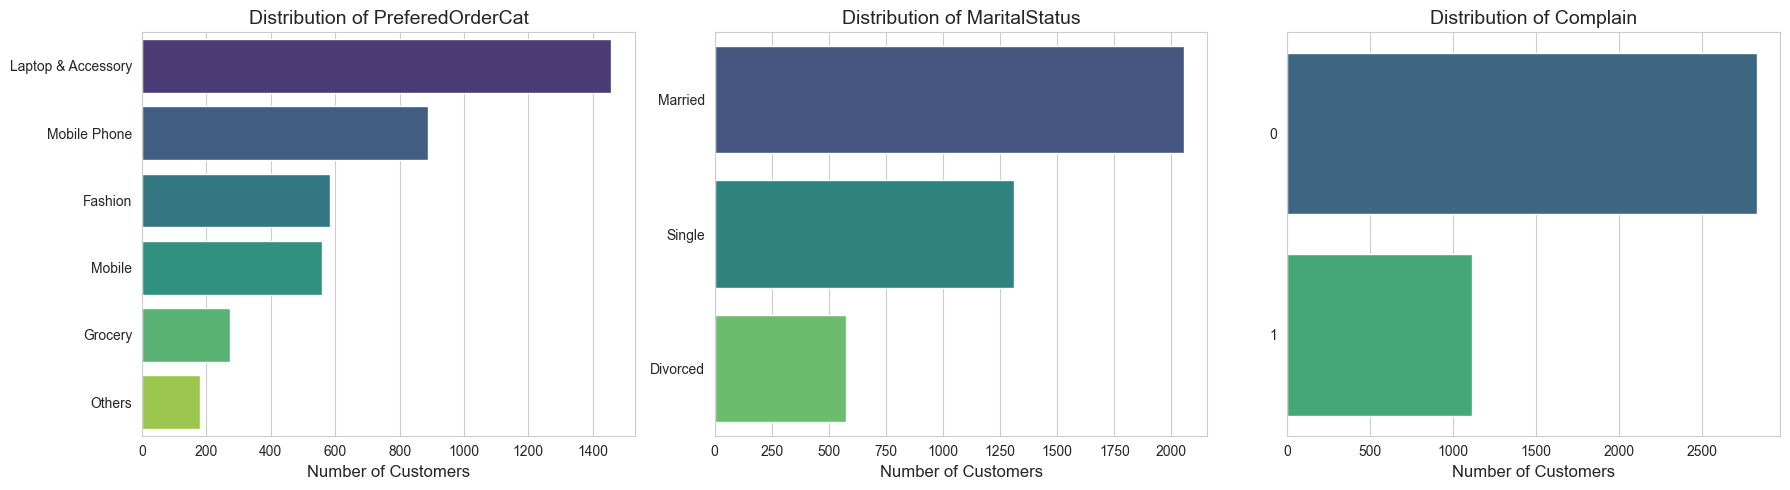

In [10]:
# Plot count plots for all categorical features
categorical_features = ['PreferedOrderCat', 'MaritalStatus', 'Complain']

plt.figure(figsize=(18, 5))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.ylabel('')
    plt.xlabel('Number of Customers', fontsize=12)
plt.tight_layout()
plt.show()


<h5> Bivariate Analysis Categorical vs Churn </h5>

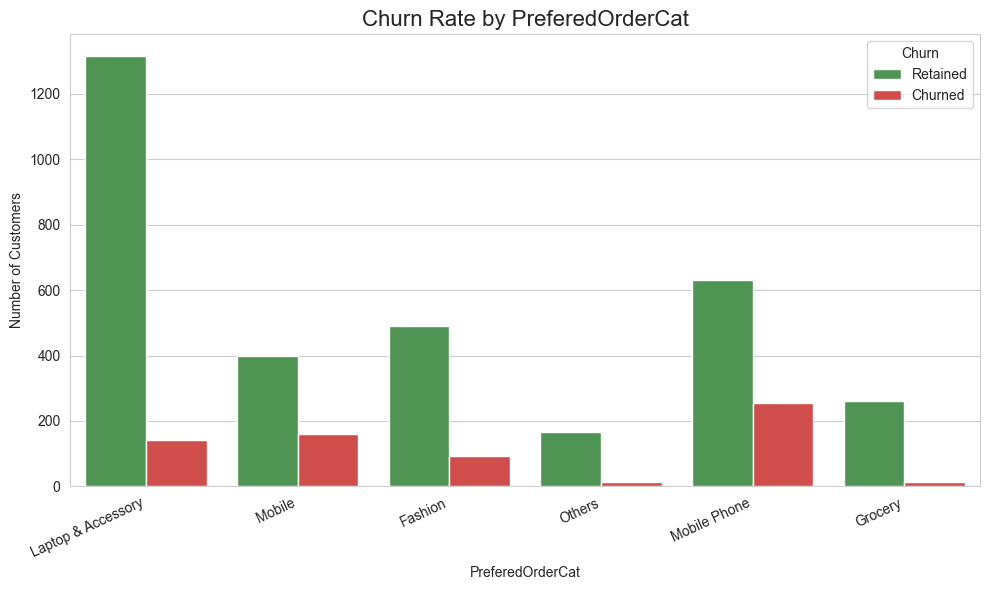

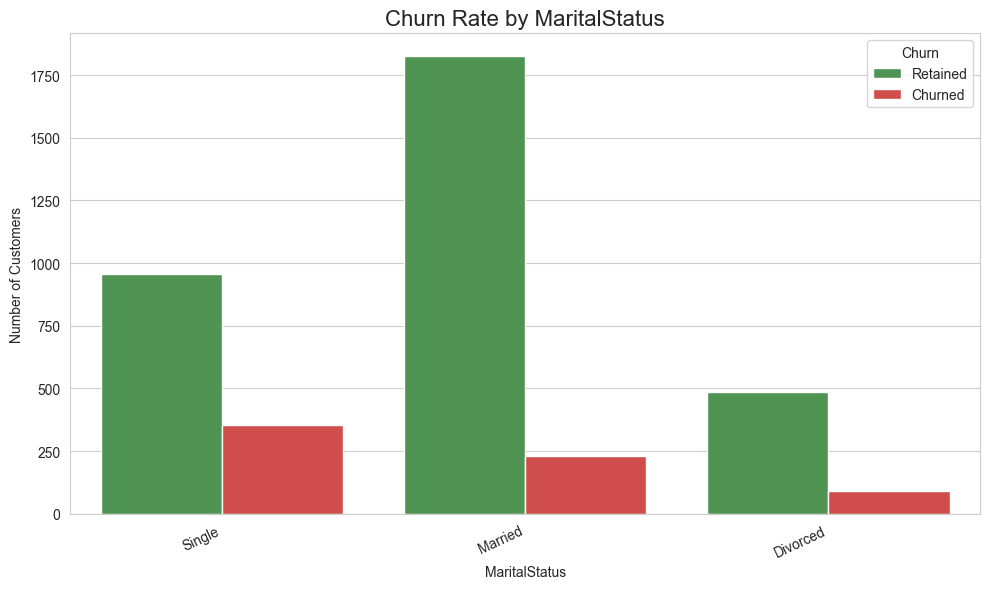

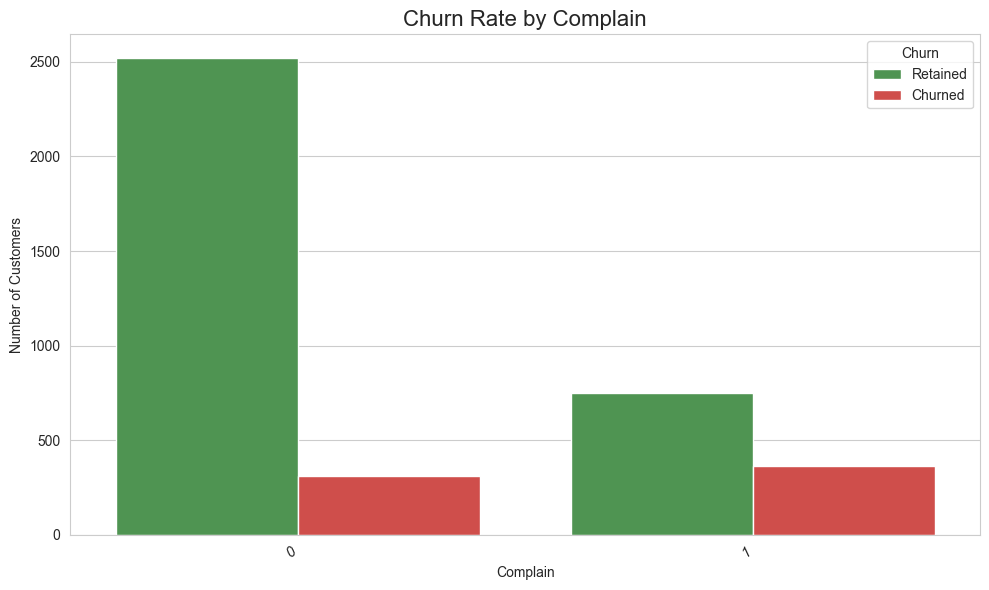

In [11]:
# Analyze the relationship between categorical features and churn
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Churn', data=df, palette=['#43a047', '#e53935'])
    plt.title(f'Churn Rate by {col}', fontsize=16)
    plt.ylabel('Number of Customers')
    plt.xlabel(col)
    plt.xticks(rotation=25, ha='right')
    plt.legend(title='Churn', labels=['Retained', 'Churned'])
    plt.tight_layout()
    plt.show()


<h5> Bivariate Analysis Numerical vs Churn </h5>

C:\Users\Eric\AppData\Local\Temp\ipykernel_31536\3652265605.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette=['#90caf9', '#f48fb1'])
C:\Users\Eric\AppData\Local\Temp\ipykernel_31536\3652265605.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette=['#90caf9', '#f48fb1'])
C:\Users\Eric\AppData\Local\Temp\ipykernel_31536\3652265605.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette=['#90caf9', '#f48fb1'])
C:\Users\Eric\AppData\Local\Temp\i

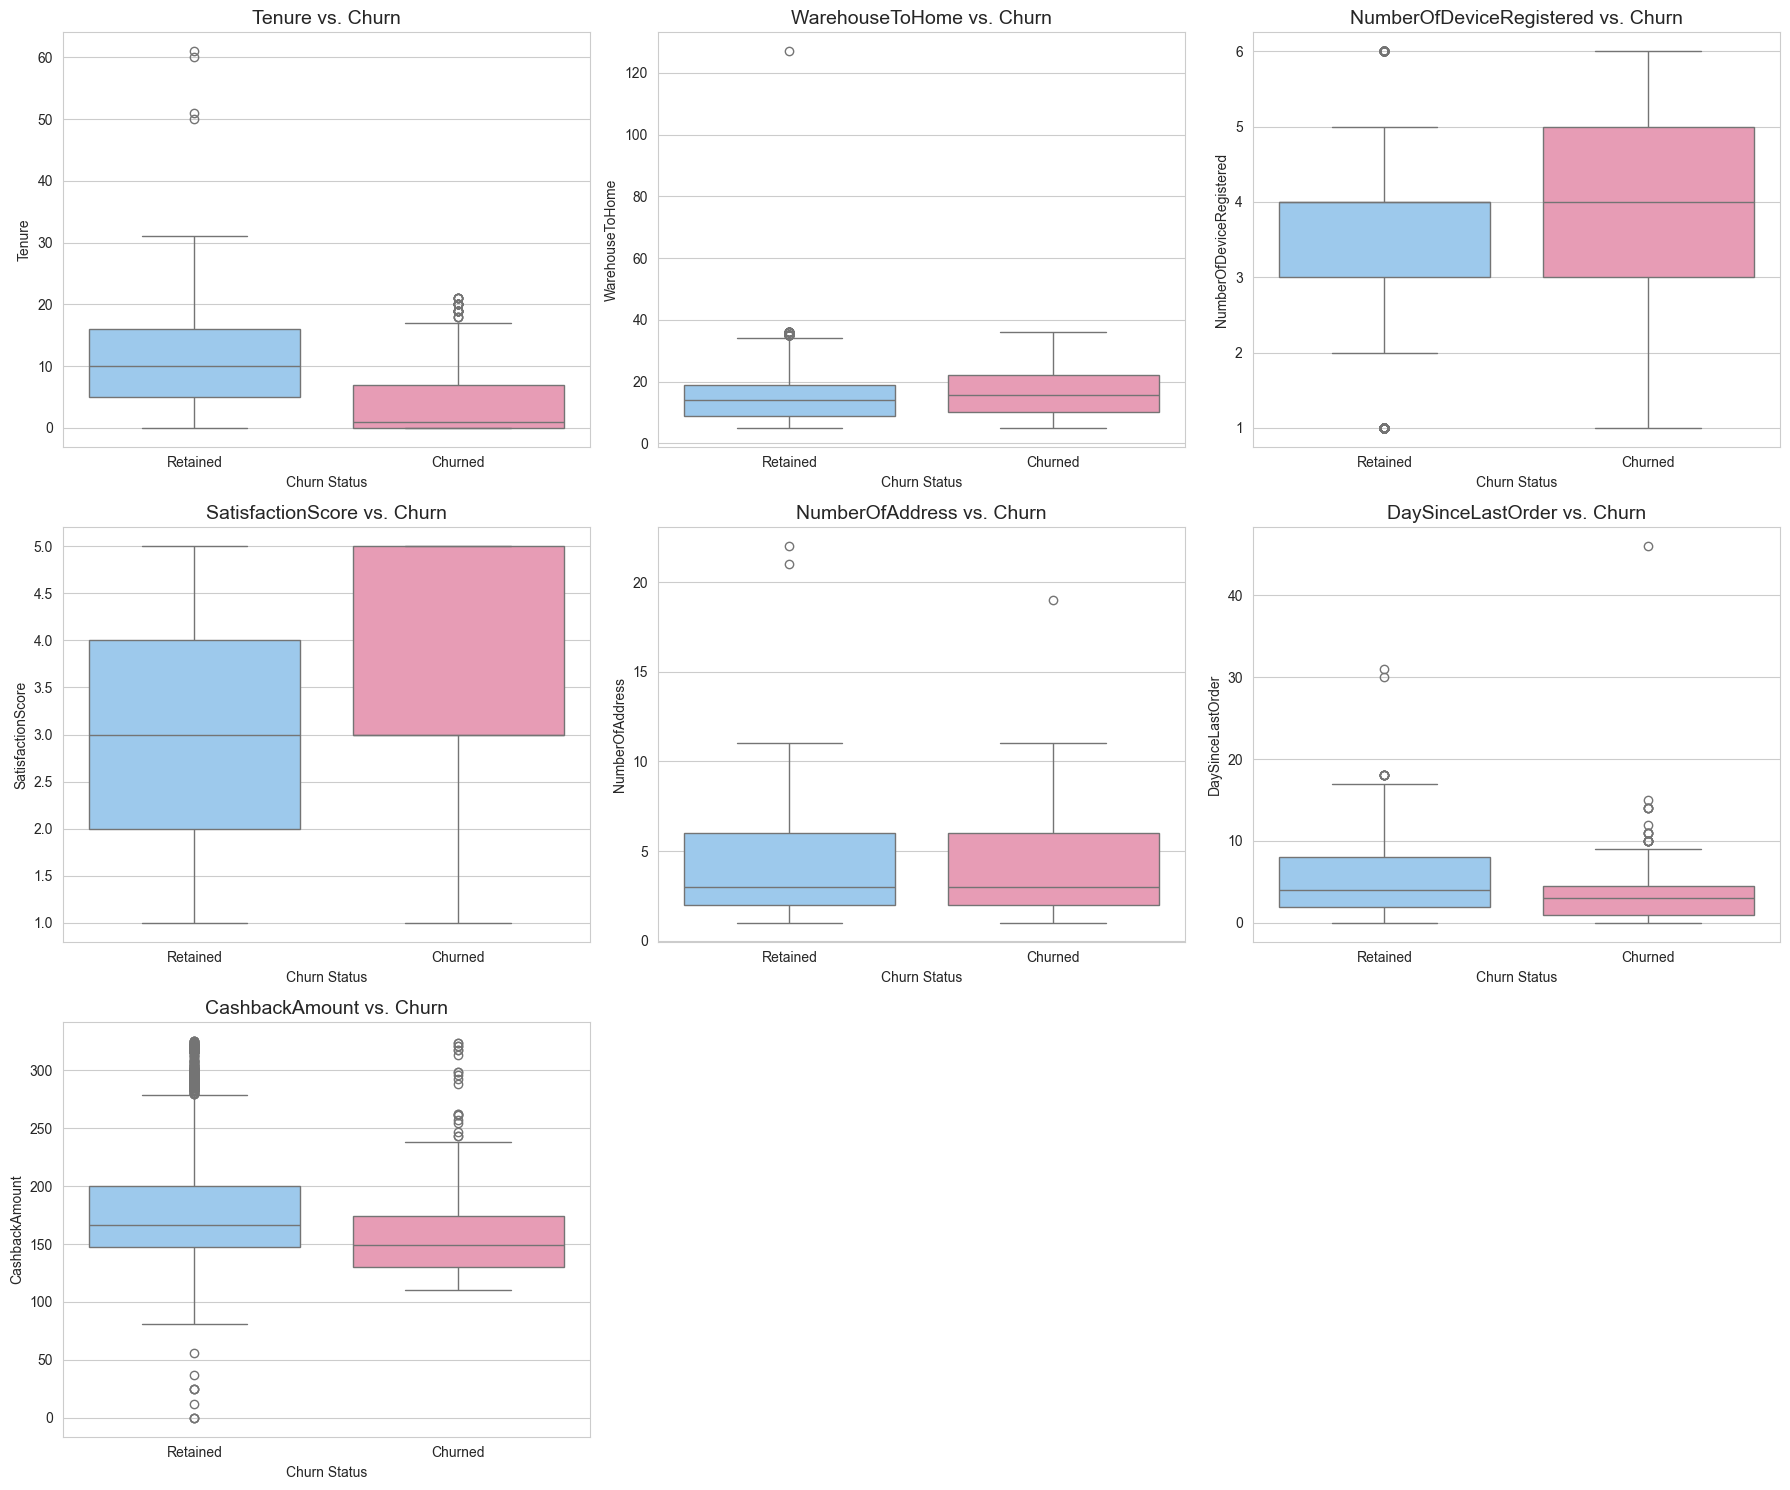

In [12]:
# Analyze the relationship between numerical features and churn using boxplots
plt.figure(figsize=(18, 15))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Churn', y=col, data=df, palette=['#90caf9', '#f48fb1'])
    plt.title(f'{col} vs. Churn', fontsize=14)
    plt.xlabel('Churn Status')
    plt.xticks([0, 1], ['Retained', 'Churned'])
    plt.ylabel(col)
plt.tight_layout()
plt.show()


<h5> Correlation Heatmap </h5>

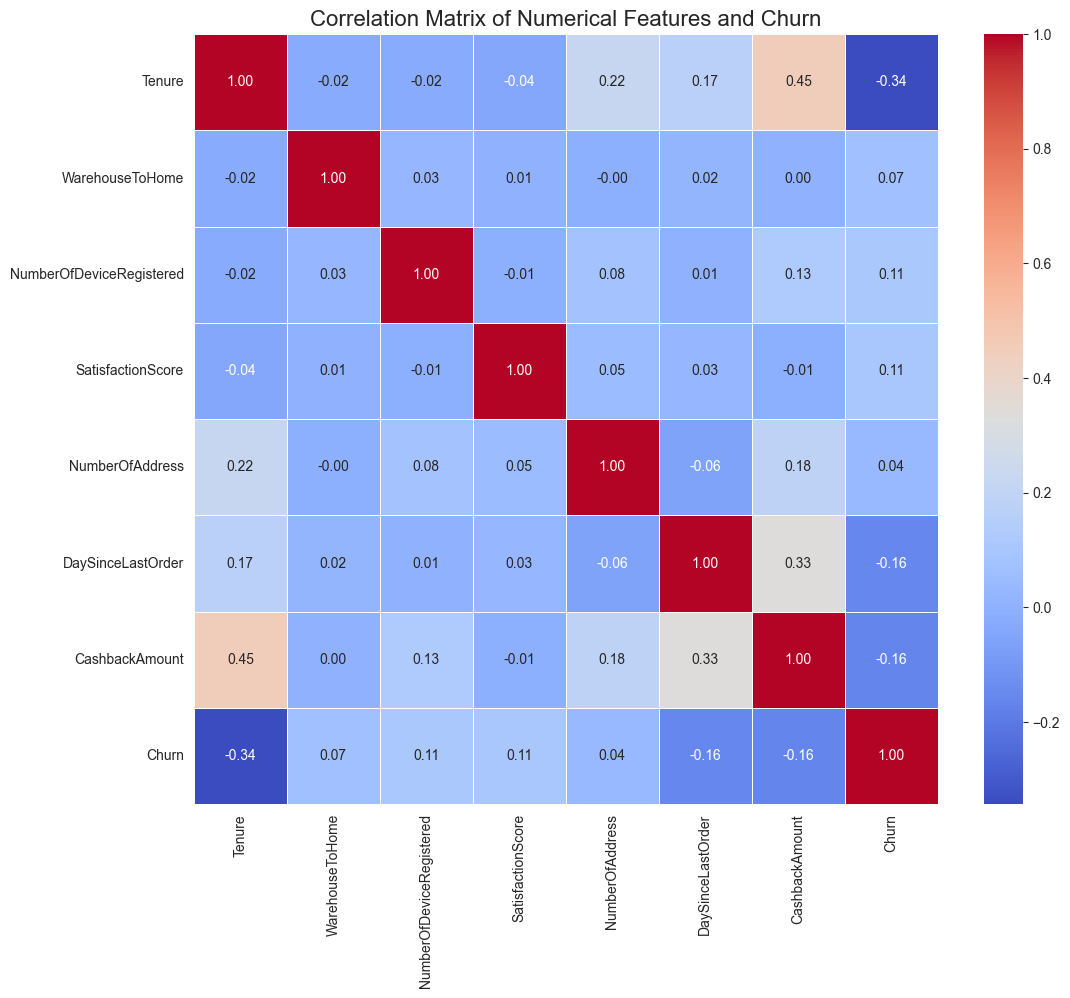

In [13]:
# Create a correlation matrix heatmap to see relationships between numerical features and churn
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_features + ['Churn']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features and Churn', fontsize=16)
plt.show()


<h4> Key Findings </h4>

Summary of Findings and Recommendations
Key Findings:

Tenure is Key: Customers with shorter tenure are significantly more likely to churn.

Complaints are Critical: Customers who have made a complaint (Complain = 1) have a very high churn rate.

Satisfaction Matters: Lower satisfaction scores are strongly associated with higher churn.

Demographics Play a Role: Single customers tend to churn more than married or divorced customers.

Product Preference: Customers who prefer 'Mobile' as an order category show a higher tendency to churn.

Actionable Recommendations:

Improve New Customer Onboarding: Create a targeted onboarding program for the first few weeks to build loyalty early.

Overhaul Complaint Resolution: Prioritize and improve the complaint handling process. A successfully resolved complaint can even increase loyalty.

Proactive Customer Outreach: Monitor satisfaction scores and proactively contact customers with low scores to address their issues before they decide to leave.

Targeted Marketing Campaigns: Develop retention campaigns specifically for at-risk segments like single customers or those purchasing from the mobile category.